# Model Development: Titanic-Spaceship <span style="color:orange">**Competition**</span>
<img src="../assets/spaceship-pic.jpg" alt="Title-Pic">

# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
from pandas import Series, DataFrame
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


np.set_printoptions(suppress=True)
sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})

# Data

In [13]:
MODEL_DATA = np.load("../model_data/titanic_spaceship_prep_data2.npz", allow_pickle=True)
inputs = MODEL_DATA["inputs"]
targets = MODEL_DATA["targets"]
DATA_COLUMN_NAMES = MODEL_DATA["input_column_names"]

X_train, X_tmp_test, y_train, y_tmp_test = train_test_split(inputs, targets, test_size=0.2, random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_tmp_test, y_tmp_test, test_size=0.5, random_state=101)

(X_train.shape, X_test.shape, X_val.shape), (y_train.shape, y_test.shape, y_val.shape)

(((7004, 11), (876, 11), (876, 11)), ((7004,), (876,), (876,)))

# Helper Functions

In [14]:
def export_model(model, model_name):
    timestamp_string = str(datetime.now())[:19].replace(" ", "").replace(":", "").replace("-", "")
    export_path = f"../trained_models/{timestamp_string}_{model_name}"
    with open(export_path, "wb") as model_file:
        pickle.dump(model, model_file)
    
    return export_path

In [15]:
def load_model(model_path):
    with open(model_path, "rb") as model_file:
        return pickle.load(model_file)

In [16]:
def print_top_rankings(model, top=10):
    sorted_zipped_report = sorted(
        zip(
            model.cv_results_["params"], 
            model.cv_results_["mean_test_score"], 
            model.cv_results_["rank_test_score"]
        ), key=lambda item: item[2]
    )
    for (i, (params, score, rank)) in enumerate(sorted_zipped_report):
        if i >= top:
            break

        print(f"Rank: {rank}\tScore: {score}\nParam: {params}\n")
        

In [17]:
def print_model_classification_report(model, X_data, y_data):
    preds_test = model.predict(X_data)
    preds_train = model.predict(X_train)

    f1_score_test = f1_score(y_data, preds_test, average="macro")
    accuracy_score_test = accuracy_score(y_data, preds_test)
    f1_score_train = f1_score(y_train, preds_train, average="macro")
    accuracy_score_train = accuracy_score(y_train, preds_train)

    print(f"Accuracy:\t{f1_score_test}\t|\tTrain-Accuracy:\t{accuracy_score_train}")
    print(f"F1-Score:\t{accuracy_score_test}\t|\tTrain-F1-Score:\t{f1_score_train}\n")
    print(classification_report(y_data, preds_test))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_data, preds_test), annot=True, cmap="cool", fmt='.5g')


In [18]:
def print_feature_importance(model):
    return Series(data=model.feature_importances_, index=DATA_COLUMN_NAMES).sort_values(ascending=False)

# Build the Model

## Model1: XXXXXXXXXX

In [19]:
xgb_model = XGBClassifier(nthread=-1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

Accuracy:	0.7896374409438542	|	Train-Accuracy:	0.8646487721302113
F1-Score:	0.7899543378995434	|	Train-F1-Score:	0.864092731615346

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78       441
         1.0       0.76      0.83      0.80       435

    accuracy                           0.79       876
   macro avg       0.79      0.79      0.79       876
weighted avg       0.79      0.79      0.79       876



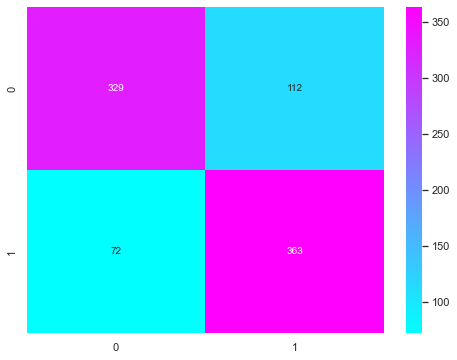

In [20]:
print_model_classification_report(xgb_model, X_test, y_test)

In [21]:
print_feature_importance(xgb_model)

CryoSleep            0.760209
HomePlanet_Earth     0.119336
HomePlanet_Europa    0.024885
VRDeck               0.014832
Spa                  0.014290
FoodCourt            0.013529
RoomService          0.013189
ShoppingMall         0.012125
HomePlanet_Mars      0.011617
Age                  0.009426
VIP                  0.006562
dtype: float32

## Model2: XXXXXXXXXX

Accuracy:	0.7978058204570142	|	Train-Accuracy:	0.7762707024557396
F1-Score:	0.797945205479452	|	Train-F1-Score:	0.7762259941975136

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       441
         1.0       0.81      0.78      0.79       435

    accuracy                           0.80       876
   macro avg       0.80      0.80      0.80       876
weighted avg       0.80      0.80      0.80       876



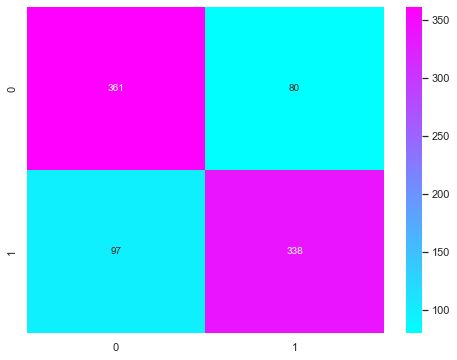

In [56]:
knn_model = KNeighborsClassifier(46) #46 -> 79,78
knn_model.fit(X_train, y_train)
print_model_classification_report(knn_model, X_test, y_test)

## RF

Accuracy:	0.8079939880700765	|	Train-Accuracy:	0.9104797258709308
F1-Score:	0.8082191780821918	|	Train-F1-Score:	0.9097841559819344

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       441
         1.0       0.78      0.85      0.81       435

    accuracy                           0.81       876
   macro avg       0.81      0.81      0.81       876
weighted avg       0.81      0.81      0.81       876



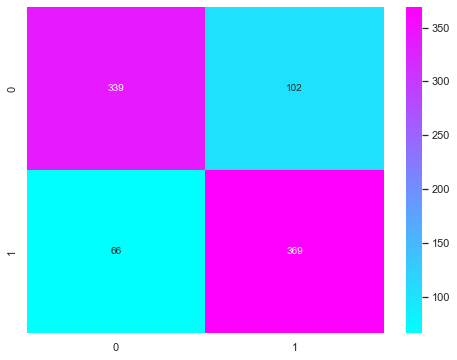

In [89]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=101) # 400|480|500 -> 80.79
rf_model.fit(X_train, y_train)
print_model_classification_report(rf_model, X_test, y_test)

Accuracy:	0.7955659276546091	|	Train-Accuracy:	0.7879782981153627
F1-Score:	0.795662100456621	|	Train-F1-Score:	0.7876216978490493

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       441
         1.0       0.78      0.82      0.80       435

    accuracy                           0.80       876
   macro avg       0.80      0.80      0.80       876
weighted avg       0.80      0.80      0.80       876



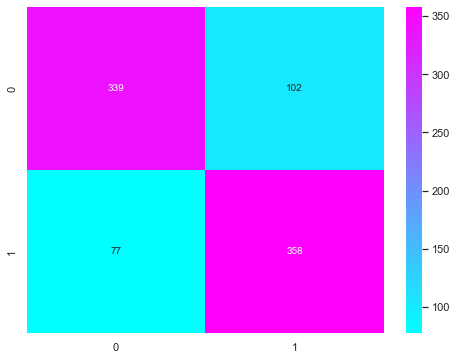

In [87]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print_model_classification_report(svm_model, X_test, y_test)

Accuracy:	0.74773533275388	|	Train-Accuracy:	0.9104797258709308
F1-Score:	0.75	|	Train-F1-Score:	0.9098112360721868

              precision    recall  f1-score   support

         0.0       0.82      0.65      0.72       441
         1.0       0.71      0.85      0.77       435

    accuracy                           0.75       876
   macro avg       0.76      0.75      0.75       876
weighted avg       0.76      0.75      0.75       876



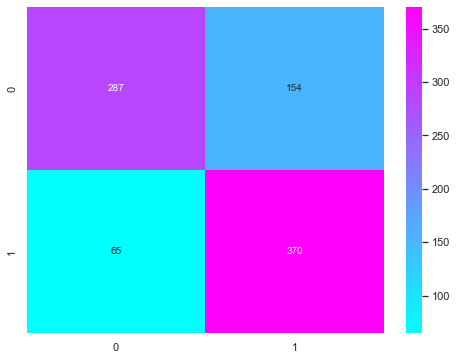

In [88]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print_model_classification_report(dt_model, X_test, y_test)

# Final Model Selection

# Export the Model